In [ ]:
# https://www.kaggle.com/code/davidmartngutirrez/bots-accounts-eda/data

# Twitter Bot Detection: Exploratory Data Analysis

Since the US Presidential Election in 2016, I (like many) have become incredibly concerned about the growth of spreading misinformation throughout social media platforms. I knew that bots played a role, but knew very little about how they worked and so my imagination ran wild: these indefatigable chaos agents, silently sowing seeds of distrust among us and disrupting democracy.

While that depiction might be part of it, it's not true of all bots. Essentially, a Twitter bot is a software bot that controls a Twitter account via the Twitter API. It can tweet, retweet, like, follow, and direct message - just like any user. The bot is governed by a set of rules by the creator. And while nefarious bots exist, Twitter does try to regular improper usage.

Some bots are just companies or organizations like the New York Times or NBA that have automated their social media.

Armed with the Twitter Bot Accounts dataset from [Kaggle](https://www.kaggle.com/code/davidmartngutirrez/bots-accounts-eda/data), I'm hoping to find features in account-level information that can aid in Twitter bot detection.

The dataset is comprised of approximately 37,000 Twitter users, labeled bot or human, with account-level information like:

number of favorites/likes
number of tweets
number of followers
number of friends (accounts their following)
whether or not the profile is still in default mode
and more
In this notebook, I'll be exploring some of these provided features as well as transforming the data to create some interesting interactions that might aid in creating a predictive classification model.



# Importing required Libraries

*   numpy
*   pandas
*   matplotlib.pyplot
*   seaborn

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing

# libraries for visualizing
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Initial Analysis 

> Descriptive Analysis

In [ ]:
twitter_human_bots = pd.read_csv('twitter_human_bots.csv', index_col=0)
twitter_human_bots.head()

,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,lang,location,profile_background_image_url,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,2016-10-15 21:32:11,False,False,"Blame @xaiax, Inspired by @MakingInvisible, us...",4,1589,4,False,787405734442958848,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/7874121826...,best_in_dumbest,11041,False,7.870,1403,bot
1,2016-11-09 05:01:30,False,False,Photographing the American West since 1980. I ...,536,860,880,False,796216118331310080,en,Estados Unidos,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/8023296328...,CJRubinPhoto,252,False,0.183,1379,human
2,2017-06-17 05:34:27,False,False,Scruffy looking nerf herder and @twitch broadc...,3307,172,594,True,875949740503859204,en,"Los Angeles, CA",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1278890453...,SVGEGENT,1001,False,0.864,1159,human
3,2016-07-21 13:32:25,True,False,Wife.Godmother.Friend.Feline Fanatic! Assistan...,8433,517,633,True,756119643622735875,en,"Birmingham, AL",NaN,http://pbs.twimg.com/profile_images/1284884924...,TinkerVHELPK5,1324,False,0.889,1489,human
4,2012-01-15 16:32:35,False,False,Loan coach at @mancity & Aspiring DJ,88,753678,116,True,464781334,en,"England, United Kingdom",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/9952566258...,JoleonLescott,4202,True,1.339,3138,human


In [ ]:
twitter_human_bots.describe()

,favourites_count,followers_count,friends_count,id,statuses_count,average_tweets_per_day,account_age_days
count,37438.000000,3.743800e+04,3.743800e+04,3.743800e+04,3.743800e+04,37438.000000,37438.000000
mean,12302.062183,3.703098e+05,4.445925e+03,1.221536e+17,2.107339e+04,6.891668,3022.128052
std,33923.650237,2.470829e+06,4.954520e+04,3.004313e+17,6.732977e+04,24.580116,1013.695870
min,0.000000,0.000000e+00,0.000000e+00,4.180000e+02,0.000000e+00,0.000000,483.000000
25%,362.000000,3.500000e+01,3.700000e+01,9.957306e+07,1.336250e+03,0.495000,2316.250000
50%,2066.000000,3.650000e+02,2.960000e+02,3.991474e+08,4.209000e+03,1.488000,3219.000000
75%,8879.000000,8.440250e+03,8.930000e+02,2.453826e+09,1.715375e+04,5.528000,3888.000000
max,885123.000000,1.216415e+08,4.343060e+06,1.120974e+18,2.771910e+06,1269.055000,5158.000000


In [ ]:
# printing all columns

count = 1
for col in twitter_human_bots.columns:
  print(f'{count} -> {col}')
  count += 1

1 -> created_at
2 -> default_profile
3 -> default_profile_image
4 -> description
5 -> favourites_count
6 -> followers_count
7 -> friends_count
8 -> geo_enabled
9 -> id
10 -> lang
11 -> location
12 -> profile_background_image_url
13 -> profile_image_url
14 -> screen_name
15 -> statuses_count
16 -> verified
17 -> average_tweets_per_day
18 -> account_age_days
19 -> account_type


In [ ]:
twitter_human_bots.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37438 entries, 0 to 37437
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   created_at                    37438 non-null  object 
 1   default_profile               37438 non-null  bool   
 2   default_profile_image         37438 non-null  bool   
 3   description                   30182 non-null  object 
 4   favourites_count              37438 non-null  int64  
 5   followers_count               37438 non-null  int64  
 6   friends_count                 37438 non-null  int64  
 7   geo_enabled                   37438 non-null  bool   
 8   id                            37438 non-null  int64  
 9   lang                          29481 non-null  object 
 10  location                      37435 non-null  object 
 11  profile_background_image_url  32939 non-null  object 
 12  profile_image_url             37437 non-null  object 
 13  s



---



# Handling Missing Values

In [ ]:
# Returns True if there are any NaN values and Returns False otherwise

twitter_human_bots.isnull().values.any()

True

In [ ]:
# Total Number of NaN values

twitter_human_bots.isnull().sum().sum()

19716

In [ ]:
# Column wise NaN value count

twitter_human_bots.isnull().sum()

created_at                         0
default_profile                    0
default_profile_image              0
description                     7256
favourites_count                   0
followers_count                    0
friends_count                      0
geo_enabled                        0
id                                 0
lang                            7957
location                           3
profile_background_image_url    4499
profile_image_url                  1
screen_name                        0
statuses_count                     0
verified                           0
average_tweets_per_day             0
account_age_days                   0
account_type                       0
dtype: int64

In [ ]:
# Returns list of columns with NaN values

twitter_human_bots.columns[twitter_human_bots.isna().any()].tolist()

['description',
 'lang',
 'location',
 'profile_background_image_url',
 'profile_image_url']

✈  We won't be using **'description', 'lang', 'profile_background_image_url' 'profile_image_url'** in our analysis. So, we can directly convert the NaN to string directly. 

✈ But for 'location' -> NaN values can be changed to 'unknown'

In [ ]:
# checking the dataframe for values for 'location' as NaN

twitter_human_bots[pd.isnull(twitter_human_bots['location'])]

,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,lang,location,profile_background_image_url,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
4393,2010-01-20 14:07:51,True,False,NaN,1312,34,95,False,106723717,NaN,NaN,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/8225219356...,warboytommo,2282,False,0.591,3863,human
19669,2011-08-01 07:35:56,True,False,We are retiring I'amSoftware as we will stop d...,65,23,0,False,346429898,en,NaN,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1770601770...,iamsoftware_inc,803,False,0.243,3306,bot
30520,2009-03-06 02:50:58,False,False,dwayne the rock johnson fan account,86090,4077366,451,True,23019705,en,NaN,http://abs.twimg.com/images/themes/theme10/bg.gif,http://pbs.twimg.com/profile_images/1200504272...,DebbyRyan,24337,True,5.817,4184,human


In [ ]:
# Most accounts have not disclosed their location. So, unknown is the mode (i.e. the account didn't disclose it for privacy reasons)

twitter_human_bots['location'].value_counts().keys()[0]

'unknown'

In [ ]:
# mode of column 'location' == 'unknown'

twitter_human_bots['location'].mode()

0    unknown
dtype: object

In [ ]:
# we replace NaN values with mode of the column 'location'

twitter_human_bots.fillna({'location': twitter_human_bots['location'].mode()}, inplace=True)



---



# Pre-Processing 1 (Type Conversion)

1. Changing the column **'created_at'** datatype from **'object'** to **'datetime'**
2. Making sure other columns with **'object'** as datatypes is converted to **'string'**

In [ ]:
# 1. Changing the column 'created_at' datatype from 'object' to 'datetime'

twitter_human_bots['created_at'] = pd.to_datetime(twitter_human_bots['created_at'])

In [ ]:
# Columns with datatype 'object'
twitter_human_bots.select_dtypes(include=['object']).columns

Index(['description', 'lang', 'location', 'profile_background_image_url',
       'profile_image_url', 'screen_name', 'account_type'],
      dtype='object')

In [ ]:
# 2. Making sure other columns with 'object' as datatypes is converted to 'string'

# Objects include Strings and mixed types
# so we make sure that Objects are converted to String

for col in twitter_human_bots.select_dtypes(include=['object']).columns:
  twitter_human_bots[col] = twitter_human_bots[col].astype('str')

In [ ]:
# checking datatypes
twitter_human_bots.dtypes

created_at                      datetime64[ns]
default_profile                           bool
default_profile_image                     bool
description                             object
favourites_count                         int64
followers_count                          int64
friends_count                            int64
geo_enabled                               bool
id                                       int64
lang                                    object
location                                object
profile_background_image_url            object
profile_image_url                       object
screen_name                             object
statuses_count                           int64
verified                                  bool
average_tweets_per_day                 float64
account_age_days                         int64
account_type                            object
dtype: object



---



# Number of Humans vs Number of Bots

In [ ]:
# value counts of humans and bots

human_bots = twitter_human_bots.account_type
human_bots.value_counts()

human    25013
bot      12425
Name: account_type, dtype: int64

In [ ]:
count_humans = human_bots.value_counts()[0]
count_bots = human_bots.value_counts()[1]

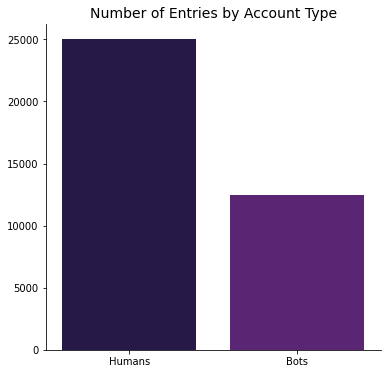

In [ ]:
plt.figure(figsize=(6, 6))
sns.barplot(x = ['Humans', 'Bots'], y = [count_humans, count_bots], palette = sns.color_palette('magma'))
plt.title("Number of Entries by Account Type", fontsize=14)
sns.despine()



---



# Bots and Humans -> Verified vs Unverified

In [ ]:
# Data Frame for Humans

humans = twitter_human_bots[twitter_human_bots['account_type'] == 'human']
humans['verified'].value_counts()

False    17778
True      7235
Name: verified, dtype: int64

In [ ]:
Humans_unverified = humans['verified'].value_counts()[0]
Humans_verified = humans['verified'].value_counts()[1]

In [ ]:
# Data Frame for Bots

bots = twitter_human_bots[twitter_human_bots['account_type'] == 'bot']
bots['verified'].value_counts()

False    12109
True       316
Name: verified, dtype: int64

In [ ]:
Bots_unverified = bots['verified'].value_counts()[0]
Bots_verified = bots['verified'].value_counts()[1]

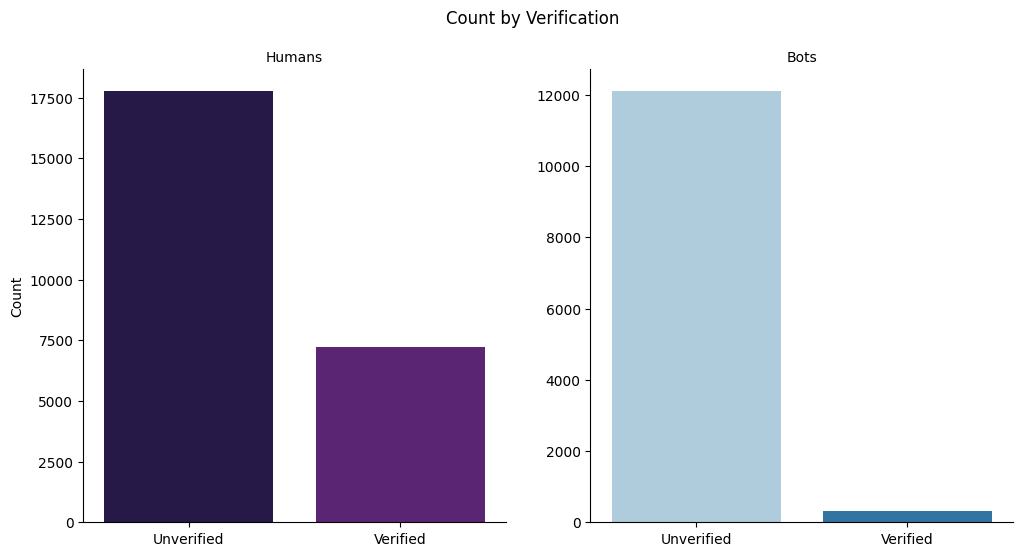

In [ ]:
# Visualizing Humans and bots (Verified vs Unverified)

plt.figure(figsize=(12,6), dpi = 100)
plt.suptitle("Count by Verification", fontsize = 12)

# (Plot 1) Plotting Humans Verified vs Unverified 
plt.subplot(1,2,1)
sns.barplot(x=['Unverified', 'Verified'], y = [Humans_unverified, Humans_verified], palette = sns.color_palette('magma'))
plt.title("Humans", fontsize = 10)
plt.ylabel("Count", fontsize = 10)
sns.despine()

# (Plot 2) Plotting Bots Verified vs Unverified
plt.subplot(1,2,2)
sns.barplot(x=['Unverified', 'Verified'], y = [Bots_unverified, Bots_verified], palette = sns.color_palette('Paired'))
plt.title("Bots", fontsize = 10)
sns.despine()

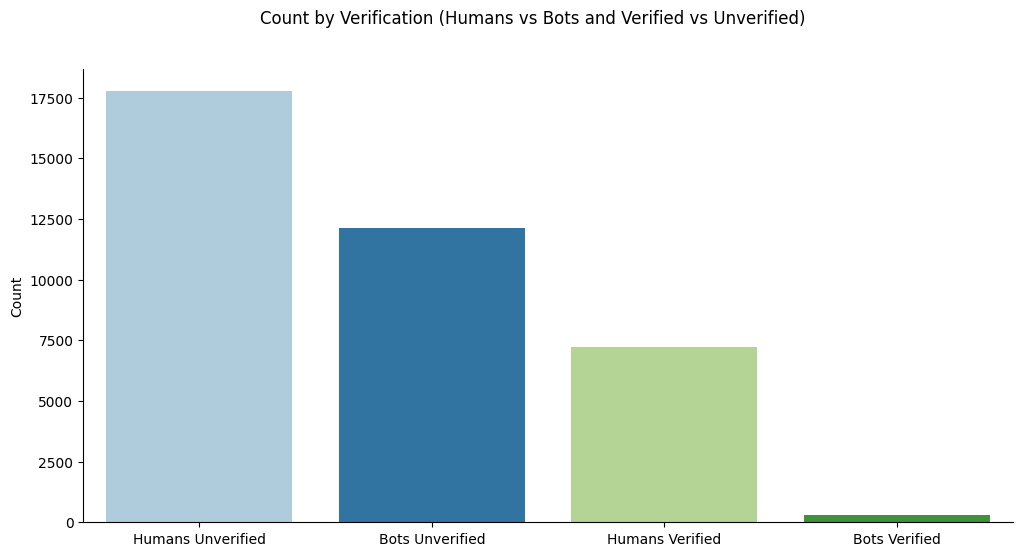

In [ ]:
plt.figure(figsize=(12,6), dpi = 100)

plt.suptitle("Count by Verification (Humans vs Bots and Verified vs Unverified)", fontsize = 12)

# Plotting Humans and Bots (Verified vs Unverified)
sns.barplot(x=['Humans Unverified', 'Bots Unverified', 'Humans Verified', 'Bots Verified'], 
            y = [Humans_unverified, Bots_unverified, Humans_verified, Bots_verified],
            palette = sns.color_palette("Paired"))
plt.ylabel("Count", fontsize = 10)
sns.despine()



---



# Pre-Processing 2 

1. Converting boolean value to binary int (1 or 0)
2. Creating a new column called bot (Binary Encoding)
3. Creating a new column called hour_created (By splicing the datetime for hour)
4. Rearranging columns and dropping 5 columns **(description, id, profile_background_image_url, profile_image_url, account_type)**

In [ ]:
# Columns with boolean datatype

twitter_human_bots.select_dtypes(include=['bool']).columns

Index(['default_profile', 'default_profile_image', 'geo_enabled', 'verified'], dtype='object')

In [ ]:
# 1. Converting boolean value to binary int (1 or 0)

for col in twitter_human_bots.select_dtypes(include=['bool']).columns:
  twitter_human_bots[col] = twitter_human_bots[col].astype(int)

In [ ]:
# 2. Creating a new column named bot (Binary Encoding)

twitter_human_bots['bot'] = twitter_human_bots['account_type'].apply(lambda acc_type: 1 if acc_type == 'bot' else 0)

In [ ]:
# 3. Creating a new column called hour_created (By splicing the datetime for hour)

twitter_human_bots['hour_created'] = pd.to_datetime(twitter_human_bots['created_at']).dt.hour

In [ ]:
# 4. Rearranging columns and dropping 5 columns (description, id, profile_background_image_url, profile_image_url, account_type)

selected_cols = ['bot', 'screen_name', 'created_at', 'hour_created', 'verified', 'location', 'geo_enabled', 
                 'lang', 'default_profile', 'default_profile_image', 'favourites_count', 'followers_count', 
                 'friends_count', 'statuses_count', 'average_tweets_per_day', 'account_age_days']

twitter_human_bots = twitter_human_bots[selected_cols]

twitter_human_bots.head()

,bot,screen_name,created_at,hour_created,verified,location,geo_enabled,lang,default_profile,default_profile_image,favourites_count,followers_count,friends_count,statuses_count,average_tweets_per_day,account_age_days
0,1,best_in_dumbest,2016-10-15 21:32:11,21,0,unknown,0,en,0,0,4,1589,4,11041,7.870,1403
1,0,CJRubinPhoto,2016-11-09 05:01:30,5,0,Estados Unidos,0,en,0,0,536,860,880,252,0.183,1379
2,0,SVGEGENT,2017-06-17 05:34:27,5,0,"Los Angeles, CA",1,en,0,0,3307,172,594,1001,0.864,1159
3,0,TinkerVHELPK5,2016-07-21 13:32:25,13,0,"Birmingham, AL",1,en,1,0,8433,517,633,1324,0.889,1489
4,0,JoleonLescott,2012-01-15 16:32:35,16,1,"England, United Kingdom",1,en,0,0,88,753678,116,4202,1.339,3138




---



# Data transformations for EDA

After looking at a few plots I noticed the distributions for this data is highly skewed, so I'm setting up some log transformations for the sake of interpretability.

The dataset provided one calculated feature - average tweets per day. I think there could be some other interesting rate-based features like follower acquisition. Also curious to look at some interactions like an overall network size and reach, like looking at tweets times followers.

In [ ]:
# Interesting new features
twitter_human_bots['avg_daily_followers'] = np.round(twitter_human_bots['followers_count'] / twitter_human_bots['account_age_days'])
twitter_human_bots['avg_daily_friends'] = np.round(twitter_human_bots['followers_count'] / twitter_human_bots['account_age_days'])
twitter_human_bots['avg_daily_favorites'] = np.round(twitter_human_bots['followers_count'] / twitter_human_bots['account_age_days'])

# Log transformations for highly skewed data
twitter_human_bots['friends_log'] = np.round(np.log(1 + twitter_human_bots['friends_count']), 3)
twitter_human_bots['followers_log'] = np.round(np.log(1 + twitter_human_bots['followers_count']), 3)
twitter_human_bots['favs_log'] = np.round(np.log(1 + twitter_human_bots['favourites_count']), 3)
twitter_human_bots['avg_daily_tweets_log'] = np.round(np.log(1+ twitter_human_bots['average_tweets_per_day']), 3)

# Possible interaction features
twitter_human_bots['network'] = np.round(twitter_human_bots['friends_log'] * twitter_human_bots['followers_log'], 3)
twitter_human_bots['tweet_to_followers'] = np.round(np.log( 1+ twitter_human_bots['statuses_count']) * np.log(1+ twitter_human_bots['followers_count']), 3)

# Log-transformed daily acquisition metrics for dist. plots
twitter_human_bots['follower_acq_rate'] = np.round(np.log(1 + (twitter_human_bots['followers_count'] / twitter_human_bots['account_age_days'])), 3)
twitter_human_bots['friends_acq_rate'] = np.round(np.log(1 + (twitter_human_bots['friends_count'] / twitter_human_bots['account_age_days'])), 3)
twitter_human_bots['favs_rate'] = np.round(np.log(1 + (twitter_human_bots['friends_count'] / twitter_human_bots['account_age_days'])), 3)


<ipython-input-33-30a34795ae36>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_human_bots['avg_daily_followers'] = np.round(twitter_human_bots['followers_count'] / twitter_human_bots['account_age_days'])
<ipython-input-33-30a34795ae36>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_human_bots['avg_daily_friends'] = np.round(twitter_human_bots['followers_count'] / twitter_human_bots['account_age_days'])
<ipython-input-33-30a34795ae36>:4: SettingWithCopyWarning: 
A value is trying to be se

# Correlations
Now that the transformations and interactions are set up, let's take a look at the correlation heatmaps of the different features.

Text(0.5, 1.0, 'Correlation of potential features: all data')

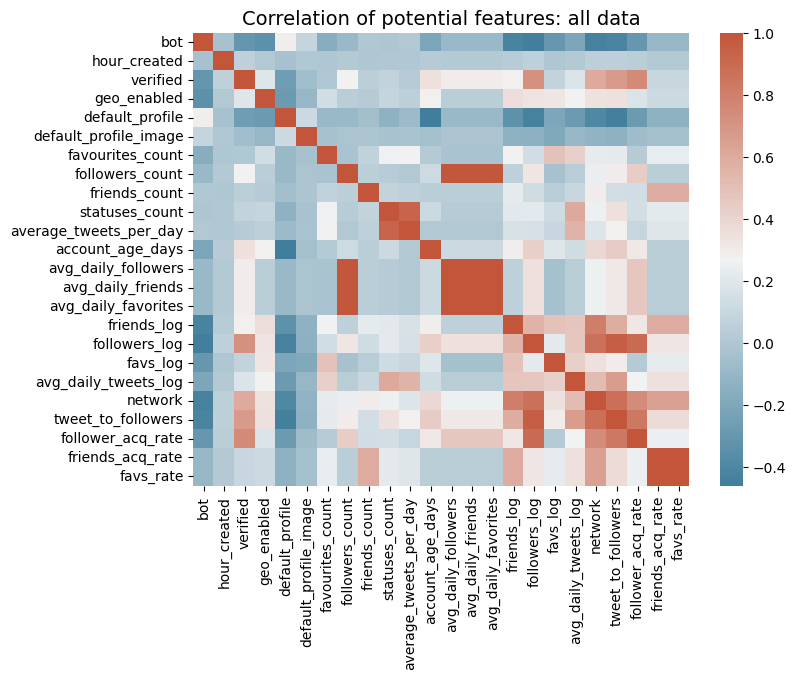

In [ ]:
plt.figure(figsize=(8,6), dpi=100)
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(twitter_human_bots.corr(), cmap=cmap, annot=False)
plt.title('Correlation of potential features: all data', fontsize=14)

# Bots vs Humans

In [ ]:
bots_series = twitter_human_bots[twitter_human_bots['bot'] == 1]
humans_series = twitter_human_bots[twitter_human_bots['bot'] == 0]

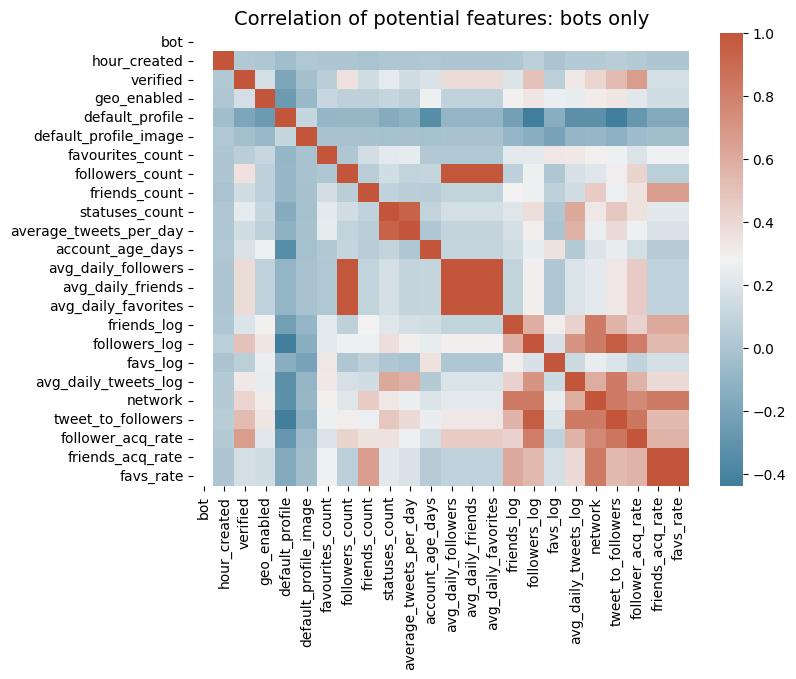

In [ ]:
plt.figure(figsize=(8,6), dpi=100)
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(bots_series.corr(), cmap=cmap, annot=False)
plt.title('Correlation of potential features: bots only', fontsize=14);

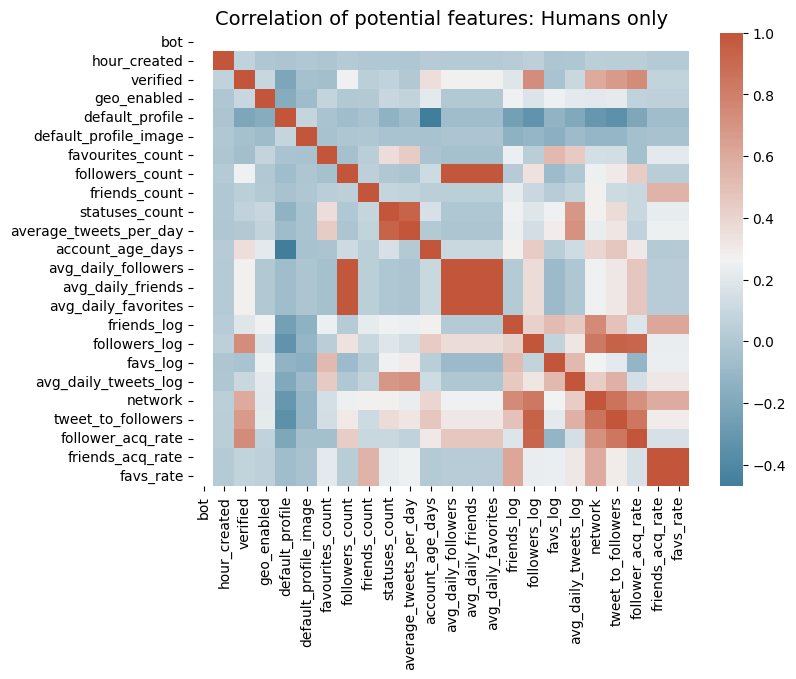

In [ ]:
plt.figure(figsize=(8,6), dpi=100)
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(humans_series.corr(), cmap=cmap, annot=False)
plt.title('Correlation of potential features: Humans only', fontsize=14);

# Distribution plots
Now to set up some distribution plots to better understand how some of the features differ between bot and human accounts.

# Account age

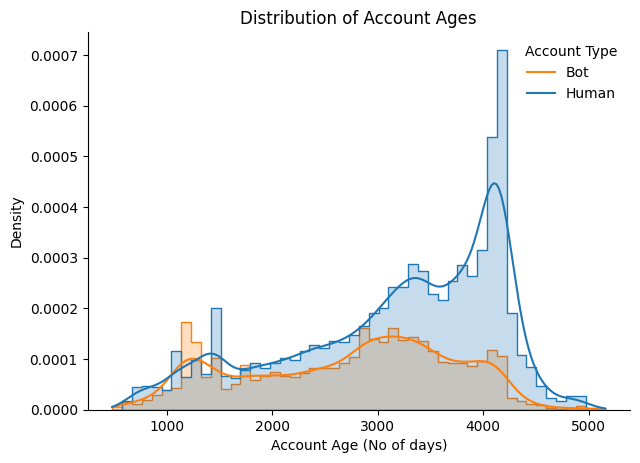

In [ ]:
plt.figure(figsize=(7,5), dpi=100)
sns.histplot(x='account_age_days', data=twitter_human_bots, hue='bot', alpha=.25, 
             kde=True, stat='density', common_bins=True, element='step', legend=True)

plt.legend(title='Account Type', loc='upper right', labels=['Bot', 'Human'], frameon=False)
plt.title('Distribution of Account Ages', fontsize=12)
plt.xlabel('Account Age (No of days)', fontsize=10)
plt.ylabel('Density', fontsize=10)
sns.despine()

# Number of followers

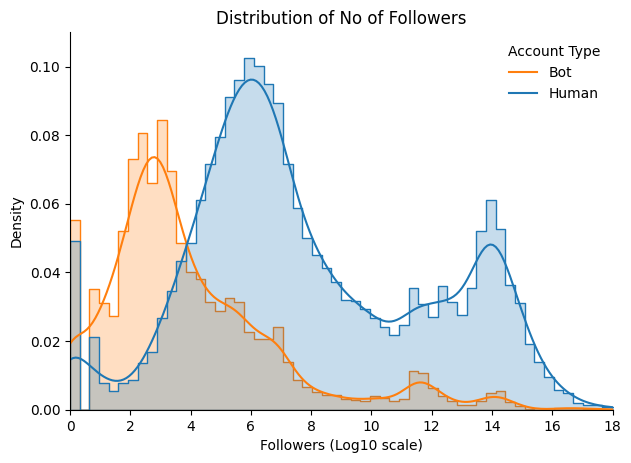

In [ ]:
plt.figure(figsize=(7,5), dpi=100)
sns.histplot(x='followers_log', data=twitter_human_bots, hue='bot', alpha=.25, 
             kde=True, stat='density', common_bins=True, element='step', legend=True)

plt.legend(title='Account Type', loc='upper right', labels=['Bot', 'Human'], frameon=False)
plt.title('Distribution of No of Followers', fontsize=12)
plt.xlabel('Followers (Log10 scale)', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.xlim(0, 18)
plt.ylim(0, 0.11)
sns.despine()

# Number of friends (following)

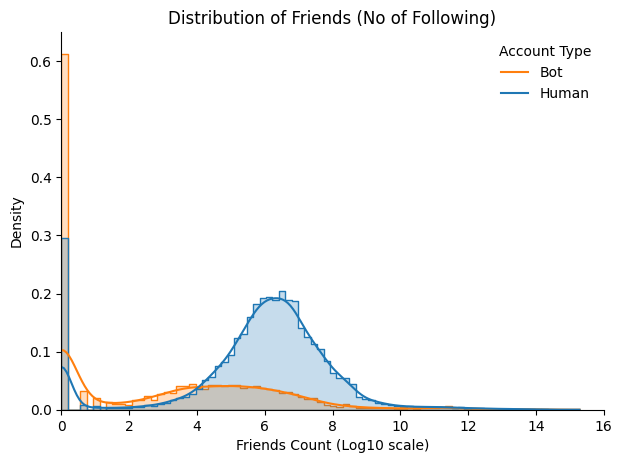

In [ ]:
plt.figure(figsize=(7,5), dpi=100)
sns.histplot(x='friends_log', data=twitter_human_bots, hue='bot', alpha=.25, 
             kde=True, stat='density', common_bins=True, element='step', legend=True)

plt.legend(title='Account Type', loc='upper right', labels=['Bot', 'Human'], frameon=False)
plt.title('Distribution of Friends (No of Following)', fontsize=12)
plt.xlabel('Friends Count (Log10 scale)', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.xlim(0, 16)
plt.ylim(0, 0.65)
sns.despine()

# Followers vs Friends

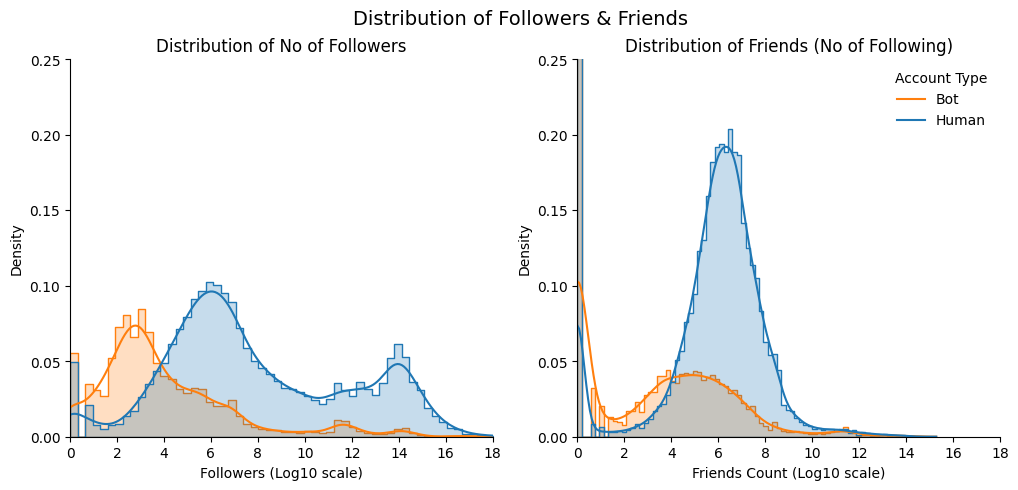

In [ ]:
plt.figure(figsize=(12,5), dpi=100)
plt.suptitle('Distribution of Followers & Friends', fontsize=14)

plt.subplot(1, 2, 1)
sns.histplot(x='followers_log', data=twitter_human_bots, hue='bot', alpha=.25, 
             kde=True, stat='density', common_bins=True, element='step', legend=False)
plt.title('Distribution of No of Followers', fontsize=12)
plt.xlabel('Followers (Log10 scale)', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.xlim(0, 18)
plt.ylim(0, 0.25)
sns.despine()

plt.subplot(1, 2, 2)
sns.histplot(x='friends_log', data=twitter_human_bots, hue='bot', alpha=.25, 
             kde=True, stat='density', common_bins=True, element='step', legend=True)

plt.legend(title='Account Type', loc='upper right', labels=['Bot', 'Human'], frameon=False)
plt.title('Distribution of Friends (No of Following)', fontsize=12)
plt.xlabel('Friends Count (Log10 scale)', fontsize=10)
plt.xlim(0, 18)
plt.ylim(0, 0.25)
sns.despine();

# Network Size
Defined as (number of friends) * (number of followers) (Log10 scale)

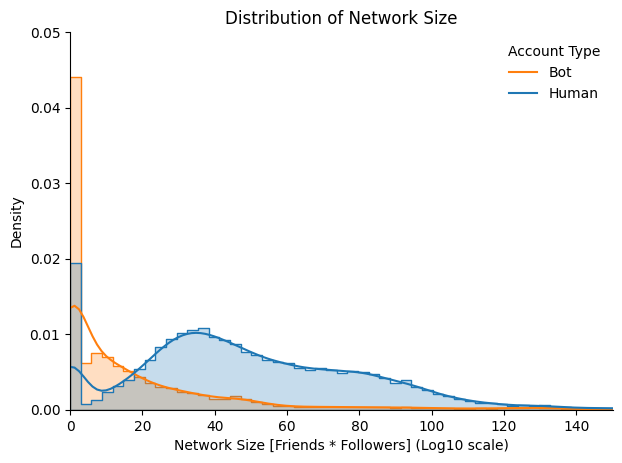

In [ ]:
plt.figure(figsize=(7,5), dpi=100)
sns.histplot(x='network', data=twitter_human_bots, hue='bot', alpha=.25, 
             kde=True, stat='density', common_bins=True, element='step', legend=True)

plt.legend(title='Account Type', loc='upper right', labels=['Bot', 'Human'], frameon=False)
plt.title('Distribution of Network Size', fontsize=12)
plt.xlabel('Network Size [Friends * Followers] (Log10 scale)', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.xlim(0, 150)
plt.ylim(0, 0.05)
sns.despine()

# Number of favorites

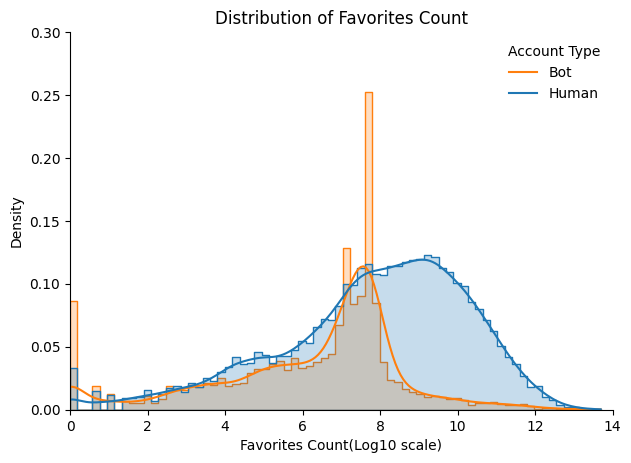

In [ ]:
plt.figure(figsize=(7,5), dpi=100)
sns.histplot(x='favs_log', data=twitter_human_bots, hue='bot', alpha=.25, 
             kde=True, stat='density', common_bins=True, element='step', legend=True)

plt.legend(title='Account Type', loc='upper right', labels=['Bot', 'Human'], frameon=False)
plt.title("Distribution of Favorites Count", fontsize=12)
plt.xlabel('Favorites Count(Log10 scale)', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.xlim(0, 14)
plt.ylim(0, 0.3)
sns.despine()

# Avg tweets per day

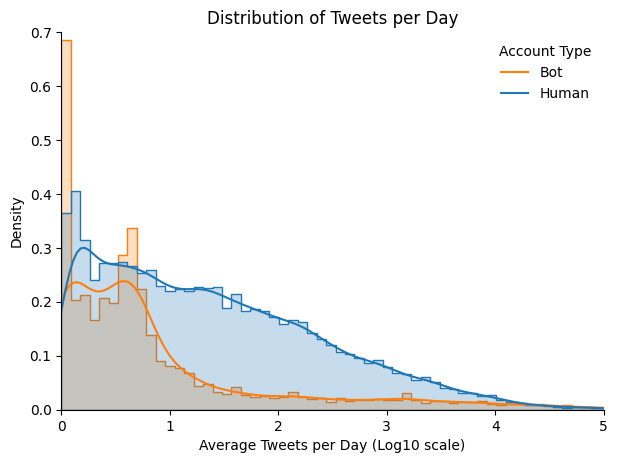

In [ ]:
plt.figure(figsize=(7,5), dpi=100)
sns.histplot(x='avg_daily_tweets_log', data=twitter_human_bots, hue='bot', alpha=.25, 
             kde=True, stat='density', common_bins=True, element='step', legend=True)

plt.legend(title='Account Type', loc='upper right', labels=['Bot', 'Human'], frameon=False)
plt.title("Distribution of Tweets per Day", fontsize=12)
plt.xlabel('Average Tweets per Day (Log10 scale)', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.xlim(0, 5)
plt.ylim(0, 0.7)
sns.despine()

# Follower acquisition rate
Can be thought of the even cadence rate of new followers per day.

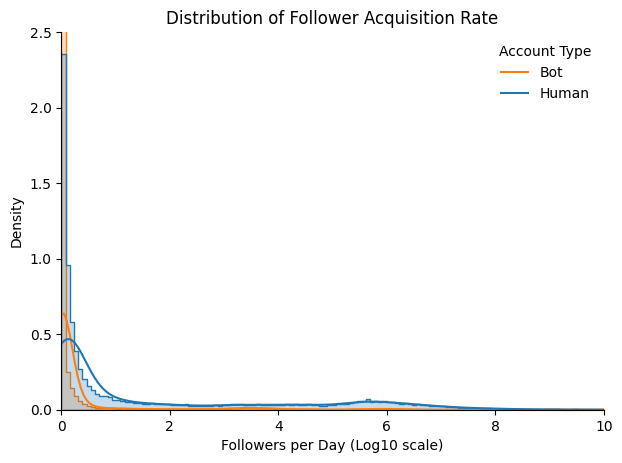

In [ ]:
plt.figure(figsize=(7,5), dpi=100)
sns.histplot(x='follower_acq_rate', data=twitter_human_bots, hue='bot', alpha=.25, 
             kde=True, stat='density', common_bins=True, element='step', legend=True)

plt.legend(title='Account Type', loc='upper right', labels=['Bot', 'Human'], frameon=False)
plt.title("Distribution of Follower Acquisition Rate", fontsize=12)
plt.xlabel('Followers per Day (Log10 scale)', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.xlim(0, 10)
plt.ylim(0, 2.5)
sns.despine();

# Friends acquisition rate

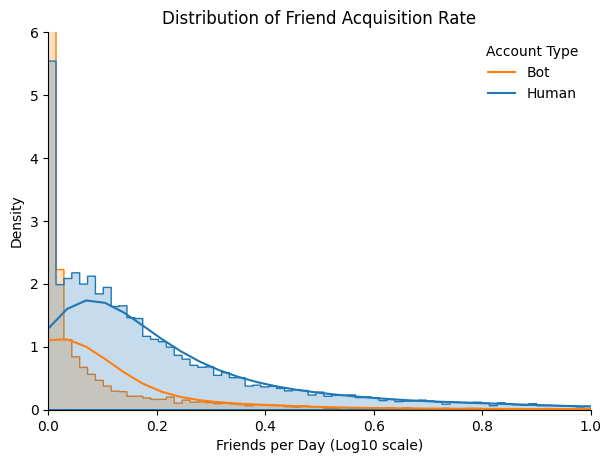

In [ ]:
plt.figure(figsize=(7,5), dpi=100)
sns.histplot(x='friends_acq_rate', data=twitter_human_bots, hue='bot', alpha=.25, 
             kde=True, stat='density', common_bins=True, element='step', legend=True)

plt.legend(title='Account Type', loc='upper right', labels=['Bot', 'Human'], frameon=False)
plt.title("Distribution of Friend Acquisition Rate", fontsize=12)
plt.xlabel('Friends per Day (Log10 scale)', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.xlim(0, 1)
plt.ylim(0, 6)
sns.despine()

# Tweets to Followers Metric
The idea here is **network \*reach\*** -- how often they're tweeting and how many people might see it. Since this is a multiplication transformation, the metric will be higher for accounts with a high tweet frequency, high following, or both.

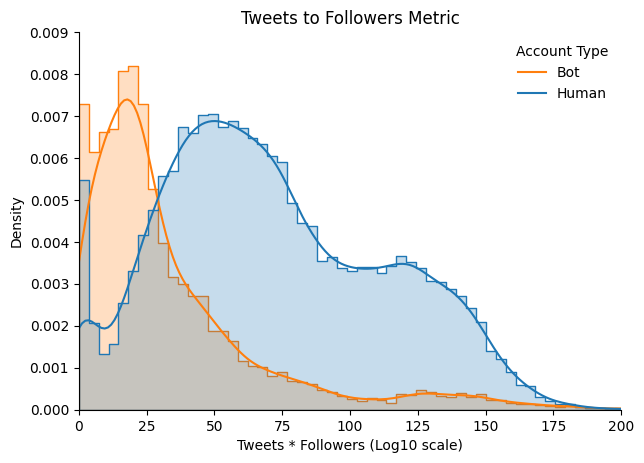

In [ ]:
plt.figure(figsize=(7,5), dpi=100)
sns.histplot(x='tweet_to_followers', data=twitter_human_bots, hue='bot', alpha=.25, 
             kde=True, stat='density', common_bins=True, element='step', legend=True)

plt.legend(title='Account Type', loc='upper right', labels=['Bot', 'Human'], frameon=False)
plt.title("Tweets to Followers Metric", fontsize=12)
plt.xlabel('Tweets * Followers (Log10 scale)', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.xlim(0, 200)
plt.ylim(0, 0.009)
sns.despine()

# Time of day account created
At what time of day are most human accounts created? When are most bots created?

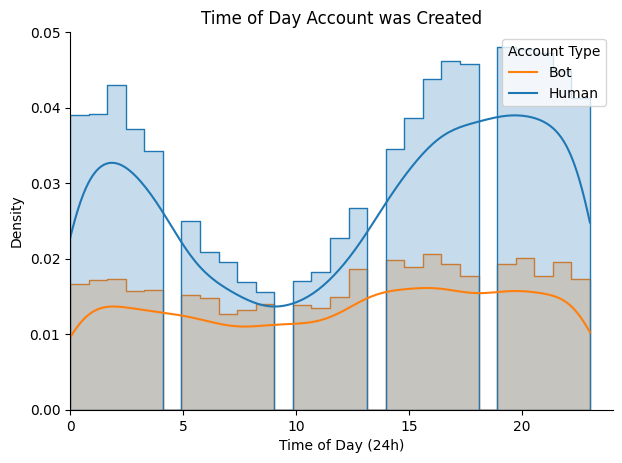

In [ ]:
plt.figure(figsize=(7,5), dpi=100)
sns.histplot(x='hour_created', data=twitter_human_bots, hue='bot', alpha=.25, 
             kde=True, stat='density', common_bins=True, element='step', legend=True)

plt.legend(title='Account Type', loc='best', labels=['Bot', 'Human'])
plt.title("Time of Day Account was Created", fontsize=12)
plt.xlabel('Time of Day (24h)', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.xlim(0, 24)
plt.ylim(0, 0.05)
sns.despine()

# Verification Status
**Verification status** is likely to be a huge feature here.

From Twitter's website:

> An account may be verified if it is determined to be an account of public interest. Typically this includes accounts maintained by users in music, acting, fashion, government, politics, religion, journalism, media, sports, business, and other key interest areas.

Verification requires a vetting process and the earlier bar plot with verification status by account type showed that the numbers differ significantly between bot and human accounts. This may not mean that bots are less likely to be verified, however, and may be the result of an imbalanced dataset. Still, it has potential to be a very important feature in the model.

(0.0, 0.025)

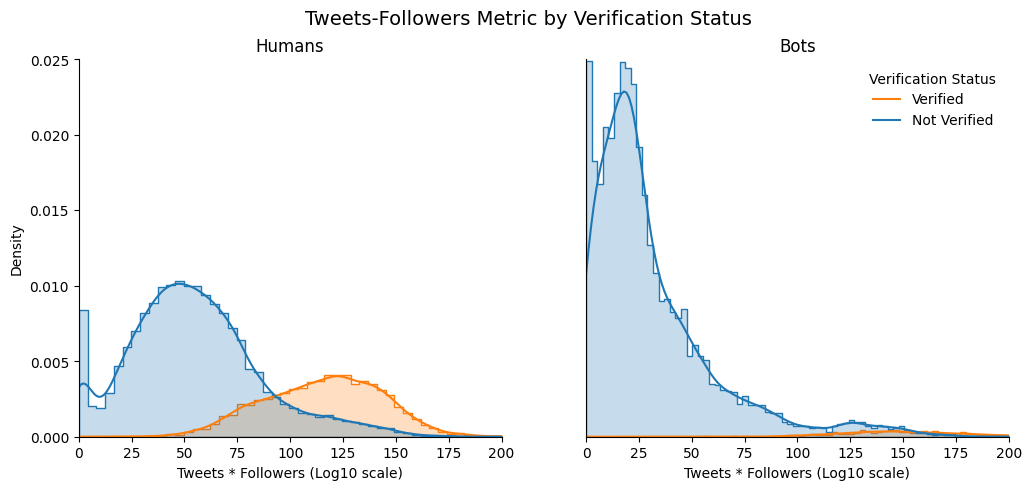

In [ ]:
plt.figure(figsize=(12,5), dpi=100)
plt.suptitle('Tweets-Followers Metric by Verification Status', fontsize=14)

plt.subplot(1, 2, 1)
sns.histplot(x='tweet_to_followers', data=humans_series, hue='verified', alpha=.25, 
             kde=True, stat='density', common_bins=True, element='step', legend=False)

plt.title("Humans", fontsize=12)
plt.xlabel('Tweets * Followers (Log10 scale)', fontsize=10)
plt.ylabel('Density', fontsize=10)
sns.despine(bottom = True, left = True)
plt.xlim(0, 200)
plt.ylim(0, 0.025)

plt.subplot(1, 2, 2)
sns.histplot(x='tweet_to_followers', data=bots_series, hue='verified', alpha=.25, 
             kde=True, stat='density', common_bins=True, element='step', legend=True)

plt.legend(title='Verification Status', loc='upper right', labels=['Verified', 'Not Verified'], frameon=False)
plt.title("Bots", fontsize=12)
plt.xlabel('Tweets * Followers (Log10 scale)', fontsize=10)
plt.ylabel("")
plt.yticks([])
sns.despine()
plt.xlim(0, 200)
plt.ylim(0, 0.025)

(0.0, 0.05)

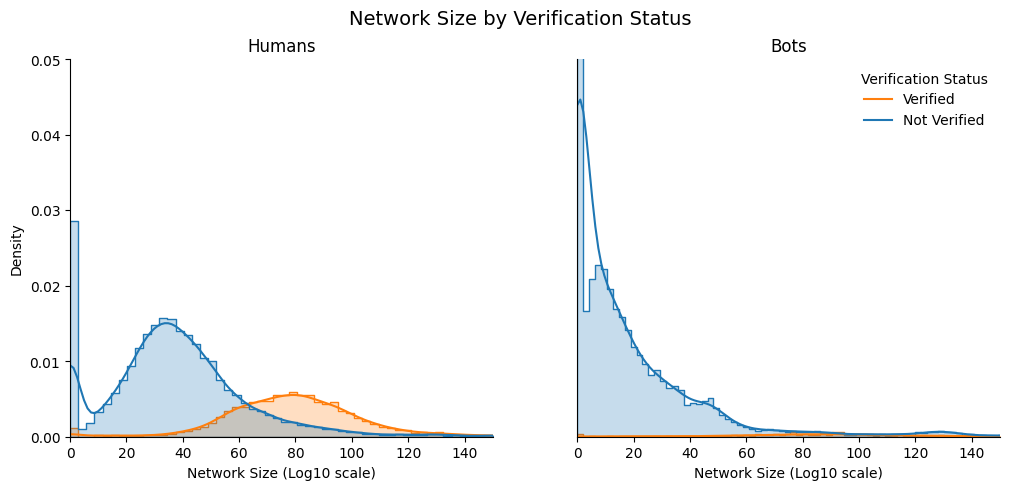

In [ ]:
plt.figure(figsize=(12,5), dpi=100)
plt.suptitle('Network Size by Verification Status', fontsize=14)

plt.subplot(1, 2, 1)
sns.histplot(x='network', data=humans_series, hue='verified', alpha=.25, 
             kde=True, stat='density', common_bins=True, element='step', legend=False)
plt.xlabel('Network Size (Friends * Followers)')
plt.title("Humans", fontsize=12)
plt.xlabel('Network Size (Log10 scale)', fontsize=10)
plt.ylabel('Density', fontsize=10)
sns.despine(bottom = True, left = True)
plt.xlim(0, 150)
plt.ylim(0, 0.05)

plt.subplot(1, 2, 2)
sns.histplot(x='network', data=bots_series, hue='verified', alpha=.25, 
             kde=True, stat='density', common_bins=True, element='step', legend=True)
plt.xlabel('Network Size (Friends * Followers)')
plt.legend(title='Verification Status', loc='upper right', labels=['Verified', 'Not Verified'], frameon=False)
plt.title("Bots", fontsize=12)
plt.xlabel('Network Size (Log10 scale)', fontsize=10)
plt.ylabel("")
plt.yticks([])
sns.despine()
plt.xlim(0, 150)
plt.ylim(0, 0.05)



---

